<img src='./redis-white.png' align=left />

redis - REmote DIctionary Server
===========================
More than a Cache

- **Shanker Janakiraman**
- Sr Director, Cloud Practice

## What is redis? ##
- an **in-memory NoSQL** Database
- **key-value** store
- open source written in about 20K lines of C
- can handle up to 2<sup>32</sup> keys, and was tested in practice to handle at least 250 million of keys per instance
- 3MB memory footprint + data
- Single threaded (no locks), event driven
  
___

## Motivation ##
  
- High performance: 100k++ requests per second per machine with 1000s of client connections
- Several million ops/sec in a cluster
- Can handle lots of data (in memory):
    - **hash maps, lists, sets, and sorted sets**
    - O(1) -- GET, PUT, PUSH, and POP operations
    - O(log(N)) -- sorted operations


## DB Engines Ranking ##
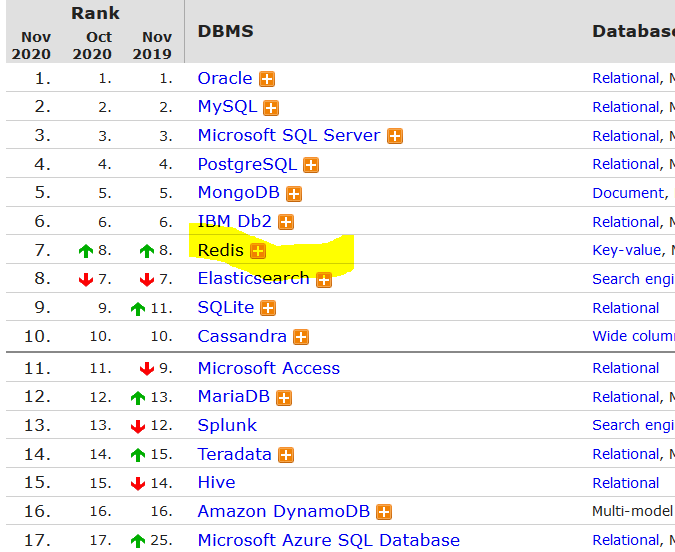
___
<br/>  


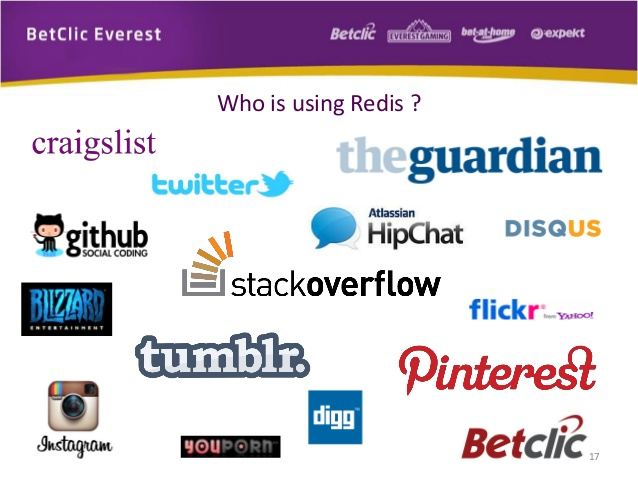  
  
___

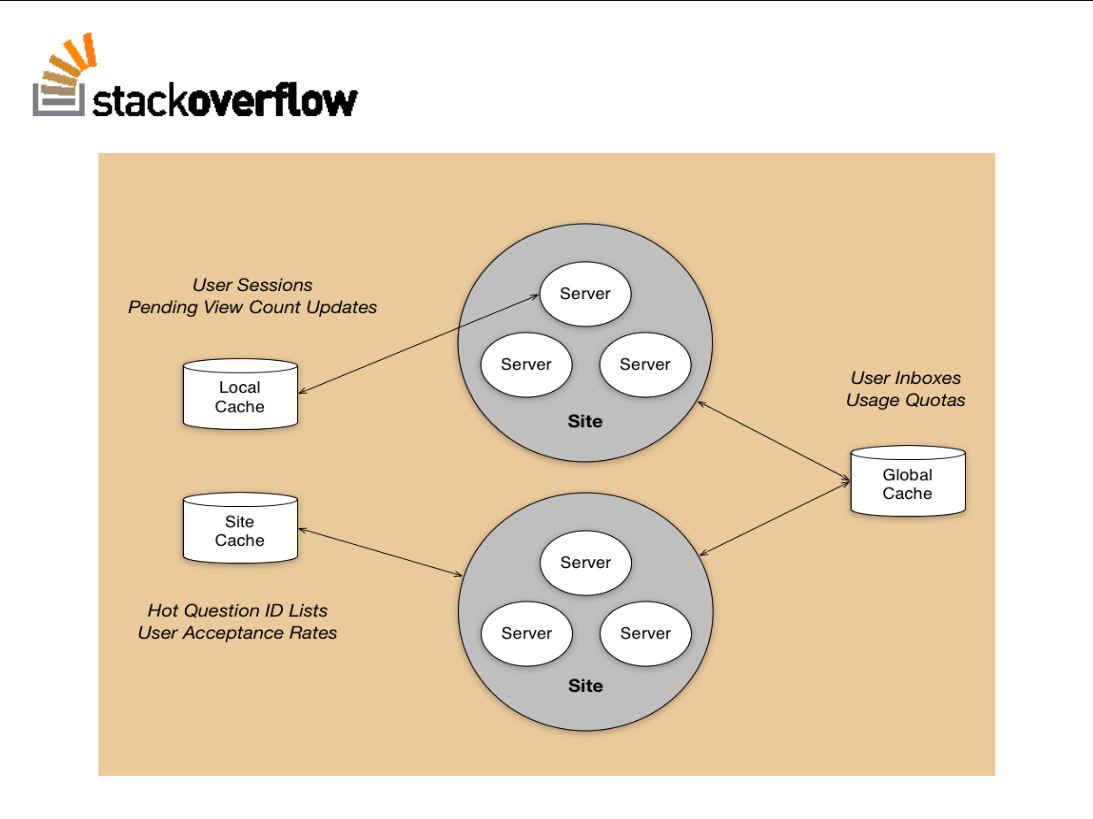

___

## Data Persistence ##
- Snapshot (Periodic Dump, "Background Save")
    - fork() with Copy-on-Write, write entire DB to disk
    - After every X seconds and Y changes
- Append Only File
    - On every write, append change to log file
    - Flexible fsync() schedule:Always, every second, or, Never

## Use Cases ##
  
- **Cache** - TTL, LRU, LFU
- Counts, Distributed Locks
- Pub-Sub, Streams
- Presence, User Feeds, Friend Suggestions

Cluster support that scales linearly

  
___


## Deployment Configurations #

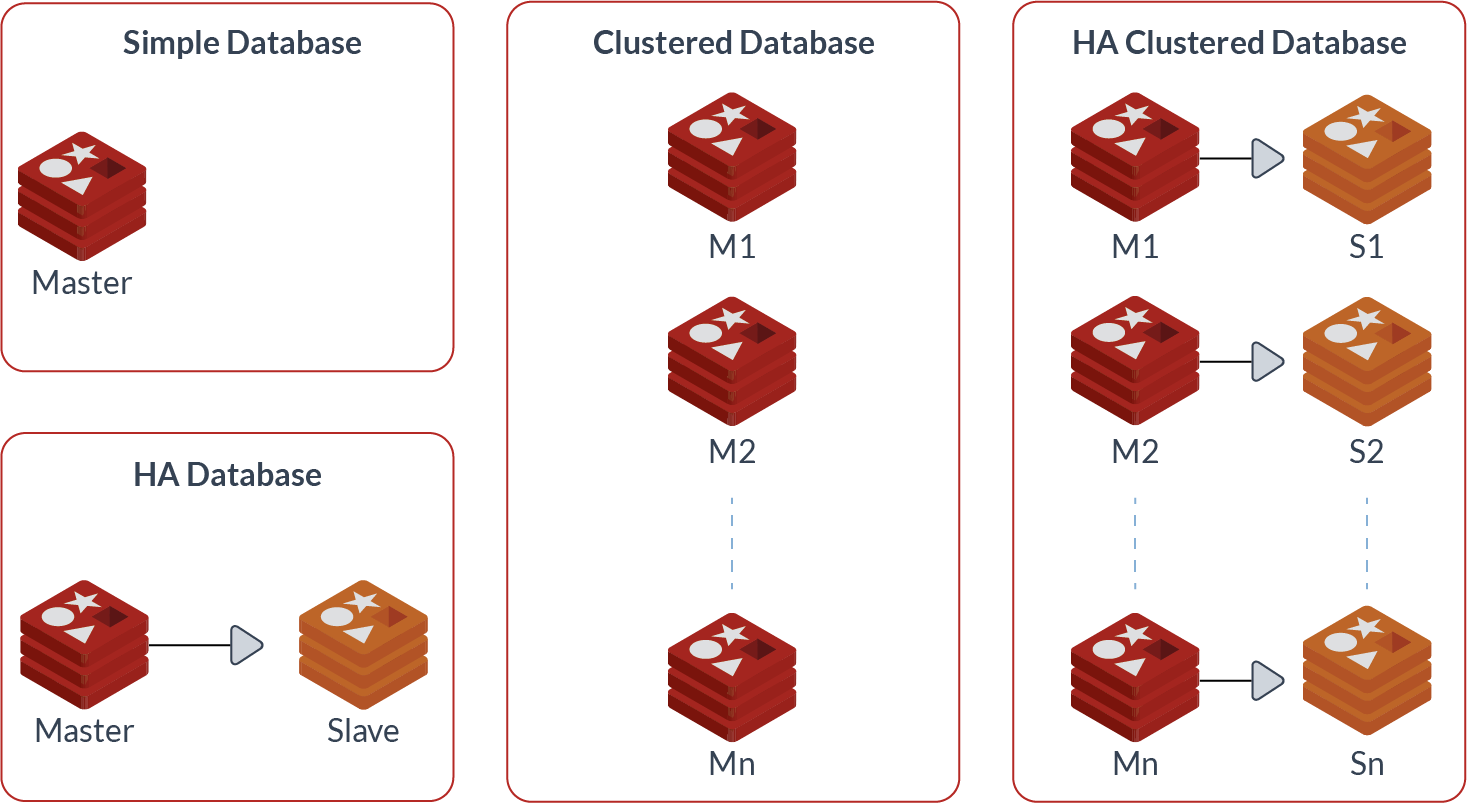

## Supported Data Structures ##

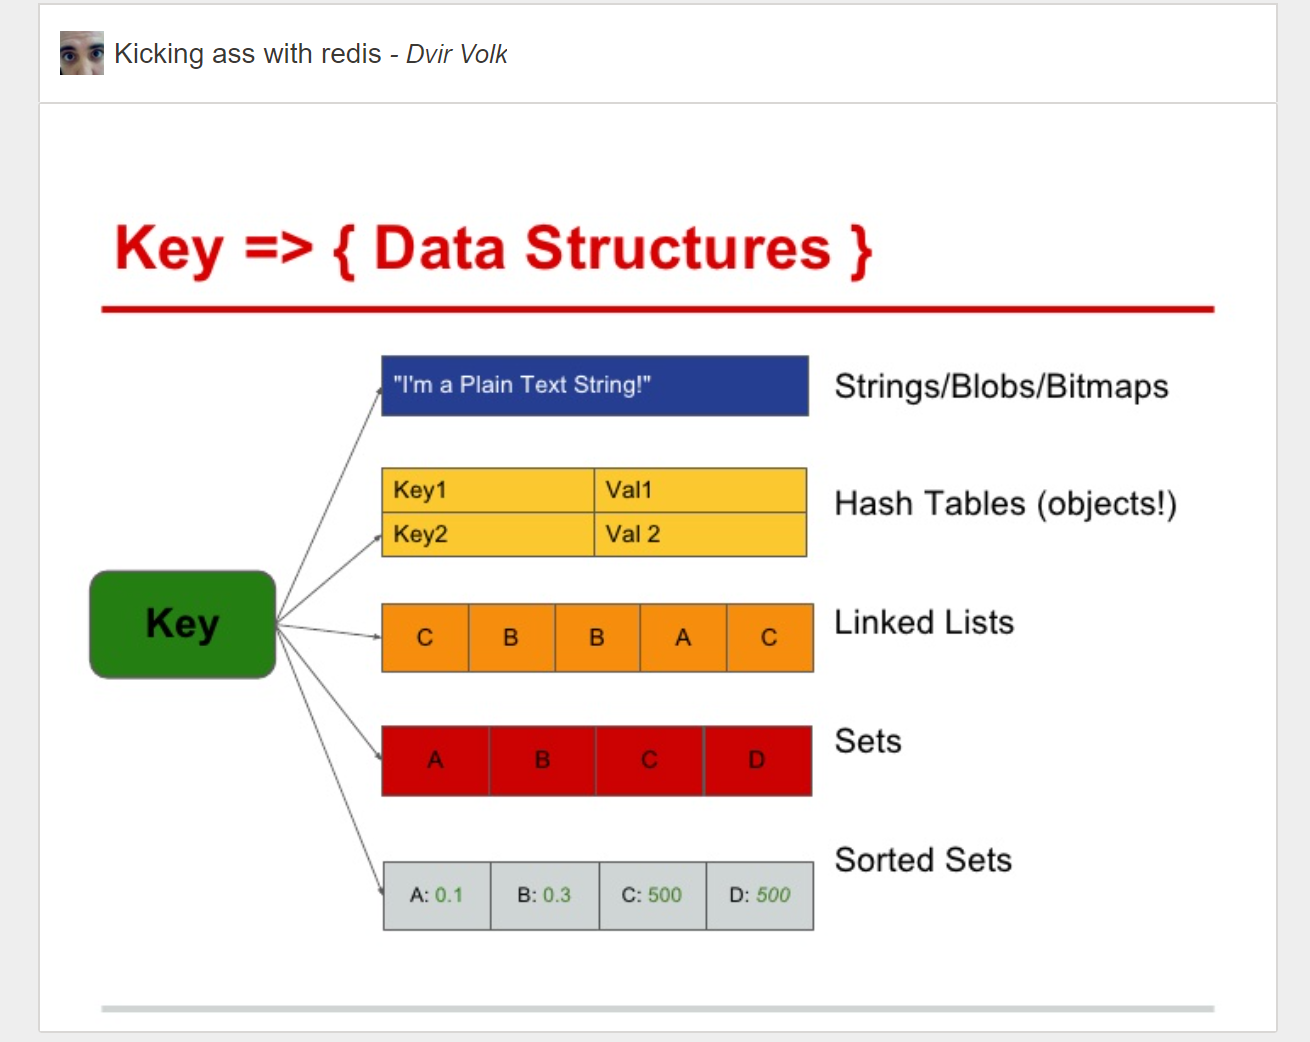
  
  
Streams support has been added since

# Key - Value #
- String key
- Value string or binary up to 512 MB
- O(1)

In [3]:
## Key - Value

import redis
r = redis.Redis(host='172.17.0.3', port=6379)
r.set('foo', 'bar')
v = r.get('foo')
print(v)

b'bar'


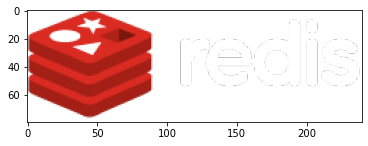

In [4]:
## Key - Binary Value

%matplotlib inline

from io import BytesIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# write image 
img = open('./redis-white.png', 'rb')
r.set('img', img.read())

# read and show
img_value = r.get('img')
image = mpimg.imread(BytesIO(img_value), format='PNG') 
plt.imshow(image)

In [5]:
# Set value only if it already exists with expiry

expiry = 2000 #millisecs
r.set('img', img_value, px=expiry, xx=True)
len(r.get('img'))

2794

In [6]:
#check after expiry
print(r.get('img'))

None


# List #
- Linked list
- Can function as stack or queue (like Java Deque)
- Read range of elements - eg latest N elements
- Cap number of elements 
- **Blocking operations**
- O(1) - O(N)

In [7]:
# Create a news feed

r.lpush('aList', 'This', 'is', 'a', 'news', 'feed')

5

In [8]:
# Empty it (for blocking call next)
r.ltrim('aList', 1000, 100)
r.llen('aList')

0

In [10]:
# Block until entry
r.brpop('aList', 60)

(b'aList', b'something')

## Sets ##
- Unique elements
- Union, Intersection
- O(1)

In [11]:
r.sadd('friends', 'Joe', 'John', 'Mary', 'Mary', 'Mary')
r.sadd('family', 'Jake', 'Sally', 'Sally', 'Sally', 'Toby', 'Mary')
r.sinter('family', 'friends')

{b'Mary'}

In [12]:
r.sunion('family', 'friends')

{b'Jake', b'Joe', b'John', b'Mary', b'Sally', b'Toby'}

## Sorted Sets ##
- Sets sorted with score
- Sorted during store; reads are faster
- O(log N)

In [13]:
r.zadd('Minecraft', 
       {'cooldude':500, 'fast_curious': 220, 'casanova':133, 'tremble': 222},
      ch=True)

0

In [14]:
r.zrange('Minecraft', 0, 1)

[b'casanova', b'fast_curious']

## Hashes ##

In [15]:
r.hset('conf_rooms', mapping={'Mars':2, 'Jupiter':2, 'Venus':2} )
r.hgetall('conf_rooms')



{b'Mars': b'2', b'Jupiter': b'2', b'Venus': b'2'}

In [16]:
r.hincrby('conf_rooms', 'Mars', -2)
r.hgetall('conf_rooms')

{b'Mars': b'0', b'Jupiter': b'2', b'Venus': b'2'}

## Probabilistic Data Structures ##
  
- Hyperloglog : Cardinality with variable error % eg <a href="https://redditblog.com/2017/05/24/view-counting-at-reddit/?utm_source=thenewstack&utm_medium=website&utm_campaign=platform">View Counting at Reddit</a>

  
___
  
  

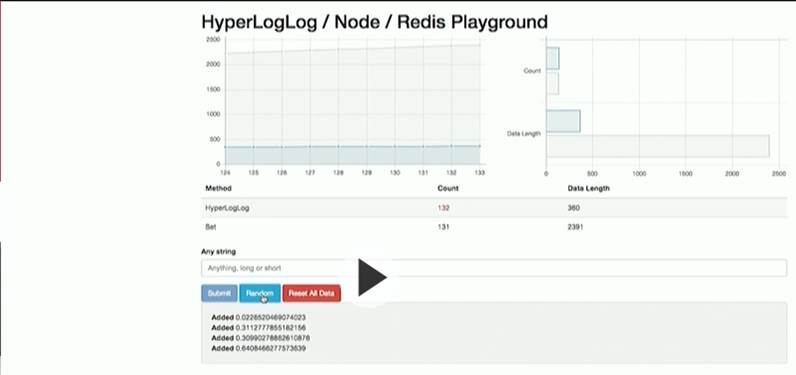

## Probabilistic Data Structures ##
- TopK
- Bloom Filter : Definitely no, may be yes
- Cuckoo Filter

## Redis Modules ##

- **RediSearch** 		Full-Text search over Redis
- **RedisGraph** 		A graph database with a Cypher-based querying language using sparse adjacency matrices 
- **RedisJSON** 		A JSON data type for Redis  
- **RedisTimeSeries** 		Time-series data structure for redis 
- **RedisGears** 		Dynamic execution framework for your Redis data **...**

## If you are curious to try... ##

- Install binary from redis.io or run a Docker image (this was done on Windows 10 with WSL2 on Docker)
- Offered by cloud providers
    - **AWS** (Elasticache for Redis); 
    - **Azure** Cache; 
    - **GCP** (Memorystore)
- https://redislabs.com/try-free for 30MB no credit-card trial with most of the above modules